## Calculating Slopes

### Rise/Run Method (UTM)

This is a conceptual slope diagram illustrating how slope is computed using **Easting, Northing, and Elevation** in UTM coordinates:

- **Red dashed line**: Horizontal distance (run) between the footprints  
- **Green dashed line**: Elevation difference (rise)  
- **Blue line**: Hypotenuse showing the slope line between Footprint 1 and Footprint 2


**Diagram Overview**

#### Two Footprints:
- **Footprint 1**: This is your **starting footprint** with coordinates `(E1, N1)` and elevation `elev1`.  
- **Footprint 2**: This is your **ending footprint** with coordinates `(E2, N2)` and elevation `elev2`.

These footprints are plotted using their **UTM coordinates** (Easting, Northing in meters), so the distances are already in meters—no need for conversion like with latitude/longitude.

---

#### The Slope Line:
- The **blue solid line** connecting the two footprints represents the actual sloped terrain between the two positions.
- This is the **hypotenuse of a right triangle**, and we want to find the **slope** of this line.

---

#### Horizontal Distance (Run):
- The **red dashed line** is the horizontal distance from Footprint 1 to the base of Footprint 2.
- It lies **along the easting direction**, ignoring any change in elevation.
- This is the **"run"** in the slope equation:  
  $
  \text{run} = \sqrt{(E2 - E1)^2 + (N2 - N1)^2}
  $

---

#### Elevation Difference (Rise):
- The **green dashed line** is the vertical distance between Footprint 1 and Footprint 2.
- This is the **"rise"** in the slope equation:  
  $
  \text{rise} = elev2 - elev1
  $

---

#### Putting It All Together:
The slope is calculated using:
$
\text{slope} = \frac{\text{rise}}{\text{run}} = \frac{\text{elev2} - \text{elev1}}{\sqrt{(E2 - E1)^2 + (N2 - N1)^2}}
$

This gives you a **unitless slope** (rise over run). You can convert this to:
- **Degrees**: `np.degrees(np.arctan(slope))`
- **Percent grade**: `slope * 100`

---

#### Why Use UTM Here?

Because:
- **UTM coordinates are in meters**, so we can directly use them in distance formulas.
- You get **real-world distances**—no curvature corrections needed like with lat/lon.
- Especially useful when working with lidar or satellite data like GEDI and ICESat-2.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, degrees


plt.style.use("~/geoscience/carbon_estimation/MNRAS.mplstyle")
%matplotlib inline

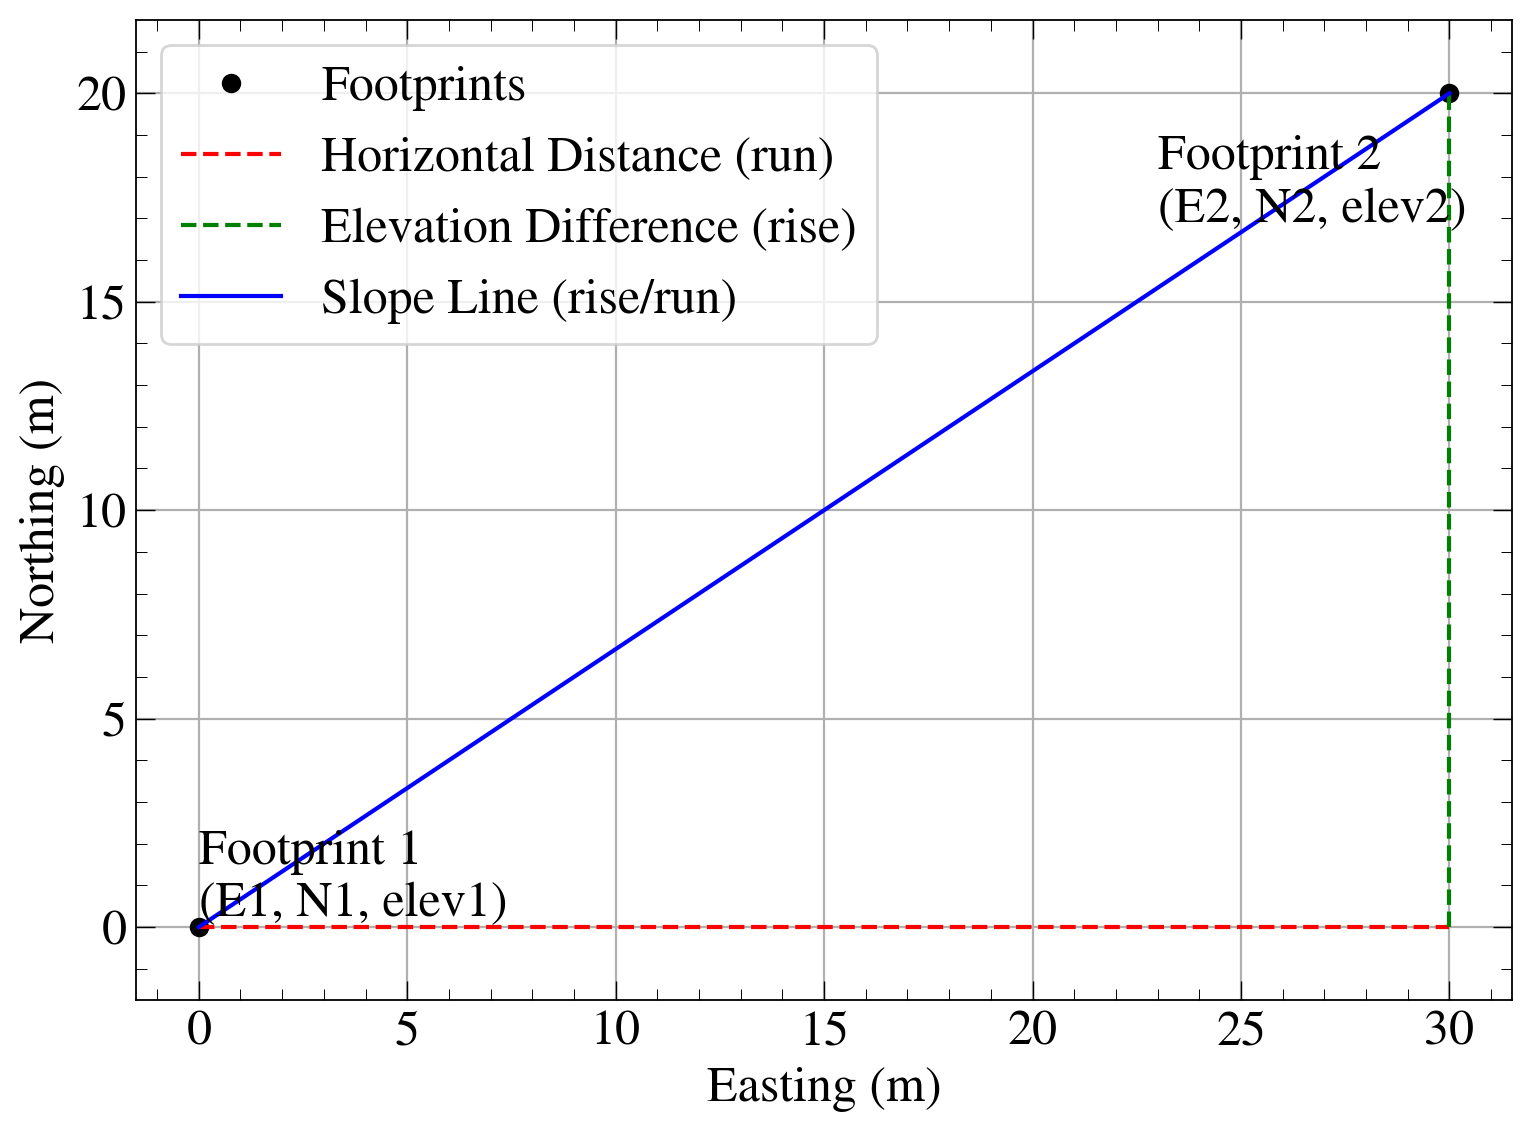

In [2]:
# Coordinates (in meters)
easting1, northing1, elev1 = 0, 0, 100
easting2, northing2, elev2 = 30, 20, 130

# Calculate differences
dx = easting2 - easting1
dy = northing2 - northing1
dz = elev2 - elev1

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Footprints
ax.plot([easting1, easting2], [northing1, northing2], 'ko', label="Footprints")
ax.text(easting1, northing1, 'Footprint 1\n(E1, N1, elev1)', verticalalignment='bottom')
ax.text(23, 19, 'Footprint 2\n(E2, N2, elev2)', verticalalignment='top')

# Horizontal leg (dx, dy)
ax.plot([easting1, easting2], [northing1, northing1], 'r--', label="Horizontal Distance (run)")

# Elevation difference (rise)
ax.plot([easting2, easting2], [northing1, northing2], 'g--', label="Elevation Difference (rise)")

# Annotate slope line
ax.plot([easting1, easting2], [northing1, northing2], 'b-', label="Slope Line (rise/run)")

# Labels and aesthetics
# ax.set_title("Conceptual Diagram: Slope from UTM Coordinates")
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.legend()
ax.axis('equal')
ax.grid(True)

plt.tight_layout()
plt.show()


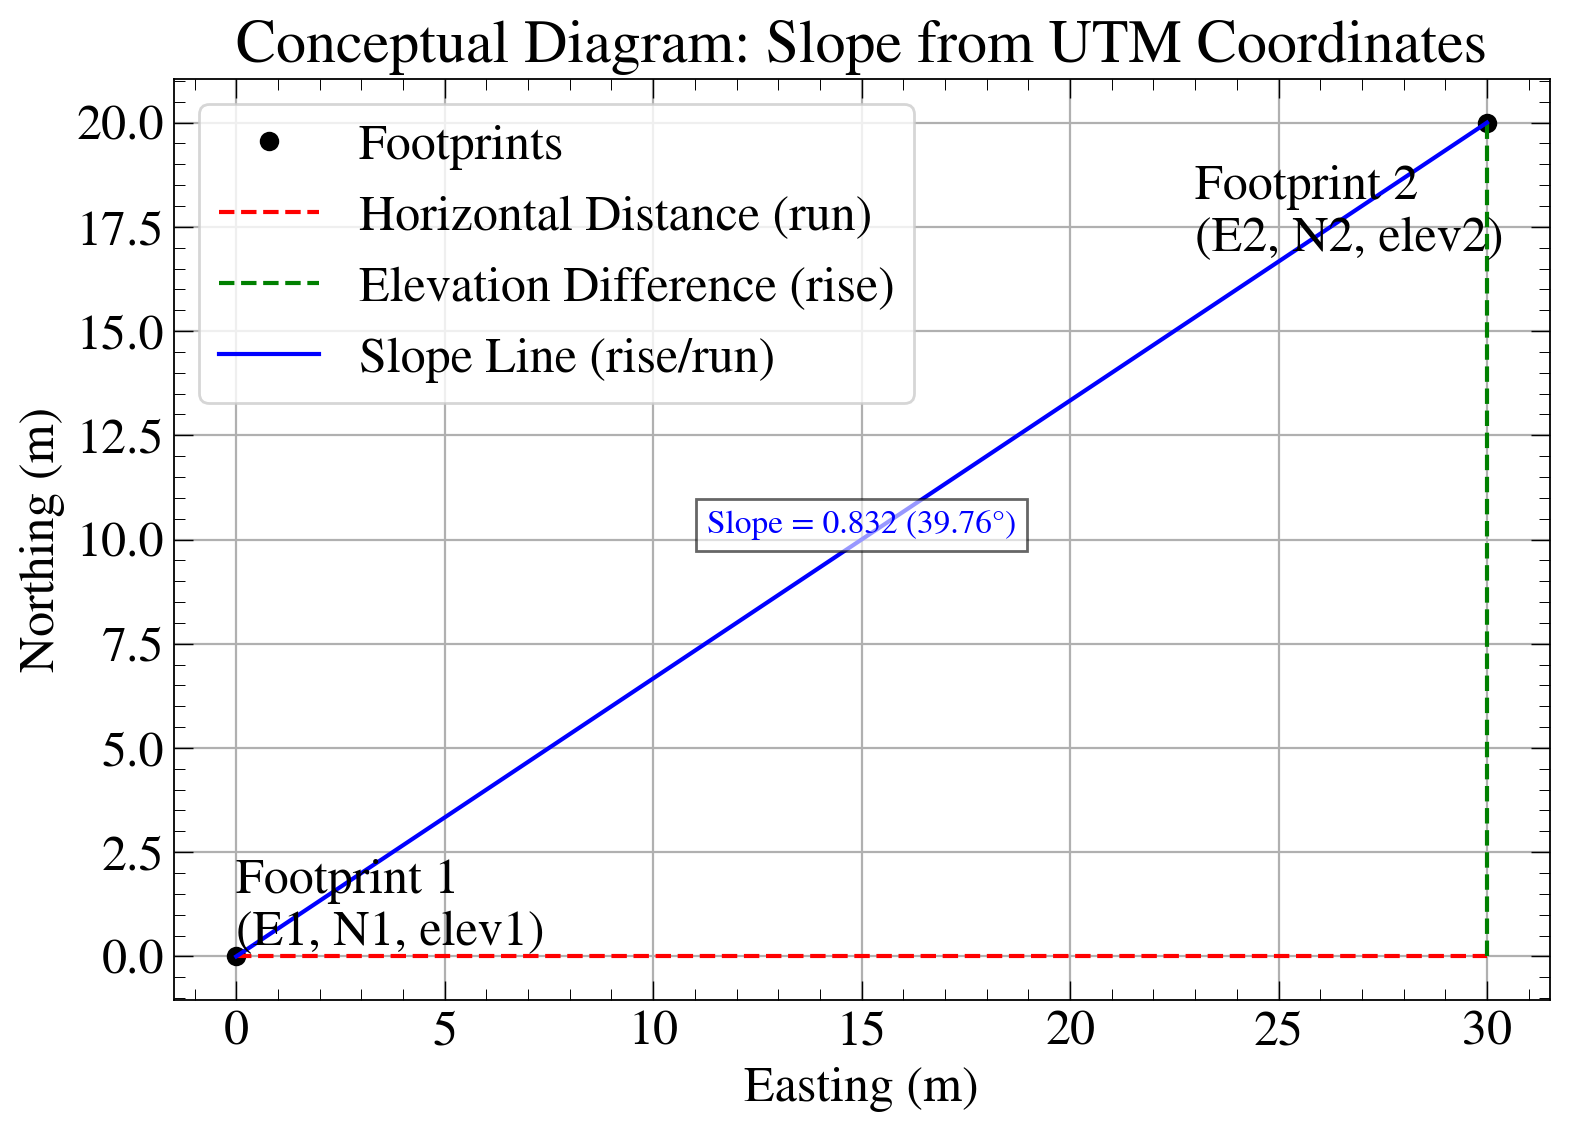

In [3]:
# Coordinates (in meters)
easting1, northing1, elev1 = 0, 0, 100
easting2, northing2, elev2 = 30, 20, 130

# Calculate differences
dx = easting2 - easting1
dy = northing2 - northing1
dz = elev2 - elev1

# Horizontal distance (run) and slope
horizontal_distance = np.sqrt(dx**2 + dy**2)
slope_ratio = dz / horizontal_distance
slope_angle = degrees(atan2(dz, horizontal_distance))

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Footprints
ax.plot([easting1, easting2], [northing1, northing2], 'ko', label="Footprints")
ax.text(easting1, northing1, 'Footprint 1\n(E1, N1, elev1)', verticalalignment='bottom')
ax.text(23, 19, 'Footprint 2\n(E2, N2, elev2)', verticalalignment='top')

# Horizontal leg (dx, dy)
ax.plot([easting1, easting2], [northing1, northing1], 'r--', label="Horizontal Distance (run)")

# Elevation difference (rise)
ax.plot([easting2, easting2], [northing1, northing2], 'g--', label="Elevation Difference (rise)")

# Annotate slope line
ax.plot([easting1, easting2], [northing1, northing2], 'b-', label="Slope Line (rise/run)")

# Annotate slope value
slope_text = f"Slope = {slope_ratio:.3f} ({slope_angle:.2f}°)"
ax.text((easting1 + easting2) / 2, (northing1 + northing2) / 2, slope_text,
        fontsize=12, color='blue', ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.6))

# Labels and aesthetics
ax.set_title("Conceptual Diagram: Slope from UTM Coordinates")
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.legend()
ax.axis('equal')
ax.grid(True)

plt.tight_layout()
plt.show()


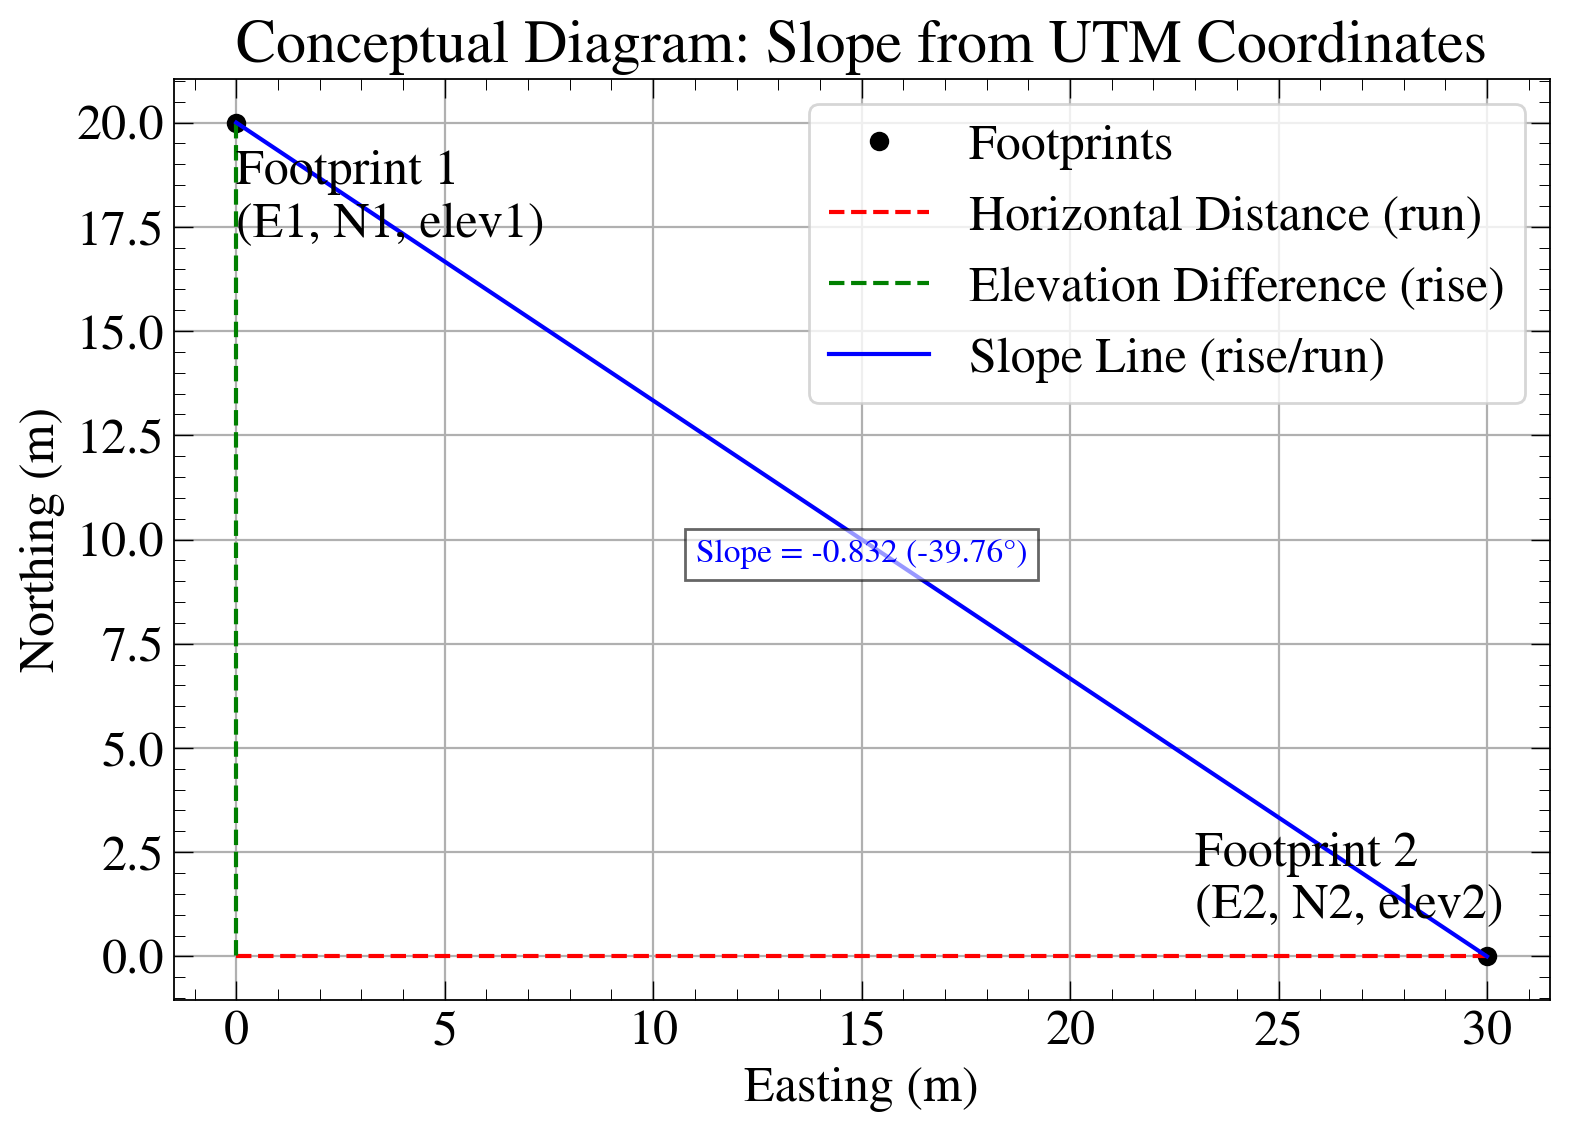

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import atan2, degrees

# Coordinates for top-left to bottom-right line
easting1, northing1, elev1 = 0, 20, 130  # Top left
easting2, northing2, elev2 = 30, 0, 100  # Bottom right

# Calculate differences
dx = easting2 - easting1
dy = northing2 - northing1
dz = elev2 - elev1  # Negative rise

# Horizontal distance (run) and slope
horizontal_distance = np.sqrt(dx**2 + dy**2)
slope_ratio = dz / horizontal_distance
slope_angle = degrees(atan2(dz, horizontal_distance))

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Footprints
ax.plot([easting1, easting2], [northing1, northing2], 'ko', label="Footprints")
ax.text(0, 17, 'Footprint 1\n(E1, N1, elev1)', verticalalignment='bottom')
ax.text(23, 3, 'Footprint 2\n(E2, N2, elev2)', verticalalignment='top')

# Horizontal leg (dx, dy)
# ax.plot([easting1, easting2], [northing1, northing1], 'r--', label="Horizontal Distance (run)")
ax.plot([easting1, easting2], [northing2, northing2], 'r--', label="Horizontal Distance (run)")

# Elevation difference (rise)
# ax.plot([easting2, easting2], [northing1, northing2], 'g--', label="Elevation Difference (rise)")
ax.plot([easting1, easting1], [northing1, northing2], 'g--', label="Elevation Difference (rise)")

# Annotate slope line
ax.plot([easting1, easting2], [northing1, northing2], 'b-', label="Slope Line (rise/run)")

# Annotate slope value
slope_text = f"Slope = {slope_ratio:.3f} ({slope_angle:.2f}°)"
ax.text((easting1 + easting2) / 2, (northing1 + northing2) / 2, slope_text,
        fontsize=12, color='blue', ha='center', va='top', bbox=dict(facecolor='white', alpha=0.6))

# Labels and aesthetics
ax.set_title("Conceptual Diagram: Slope from UTM Coordinates")
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")
ax.legend()
ax.axis('equal')
ax.grid(True)

plt.tight_layout()
plt.show()

### Haversine Method (rise/run) (WGS Lon/Lat)


#### **Explanation of `calculate_slope_haversine()` Function**

The function calculates the **horizontal ground distance** (great-circle distance) between two footprints on Earth using the **Haversine formula**, which accounts for the curvature of the Earth.

---

#### Function Breakdown

```python
def calculate_slope_haversine(lat1, lon1, lat2, lon2):
```
- Inputs: geographic coordinates (latitude and longitude) in **degrees**
- Output: **horizontal distance in meters**

---

#### Step-by-Step:

##### 1. **Convert Latitudes to Radians**
```python
phi1, phi2 = radians(lat1), radians(lat2)
```
- Because trigonometric functions in Python work with **radians**, not degrees.

##### 2. **Compute Differences in Lat/Lon (radians)**
```python
delta_phi = radians(lat2 - lat1)
delta_lambda = radians(lon2 - lon1)
```
- These represent the angular difference between the two locations.

##### 3. **Apply the Haversine Formula**
```python
a = sin(delta_phi / 2) ** 2 + cos(phi1) * cos(phi2) * sin(delta_lambda / 2) ** 2
c = 2 * atan2(sqrt(a), sqrt(1 - a))
```
- This calculates the **angular distance** between two footprints on a sphere.

##### 4. **Convert to Meters**
```python
R = 6371000  # Radius of Earth in meters
distance = R * c
```
- This gives the **horizontal ground distance** between the two footprints in **meters**.

---

#### Conceptual Slope Diagram

In the diagram above:

- **Blue Line**: The true slope path from Footprint A to Footprint B.
- **Red Dashed Line**: The horizontal "ground" distance computed using the **Haversine formula**.
- **Green Dashed Line**: The vertical difference in elevation (rise).

This forms a **right triangle**, and the slope can be calculated as:

$
\text{slope} = \frac{\text{elev2} - \text{elev1}}{\text{Haversine distance}}
$

---

### When to Use This Function

Use this approach **when your data is in geographic coordinates (lat/lon)** and you are calculating over **larger distances** where the Earth's curvature becomes important.

---

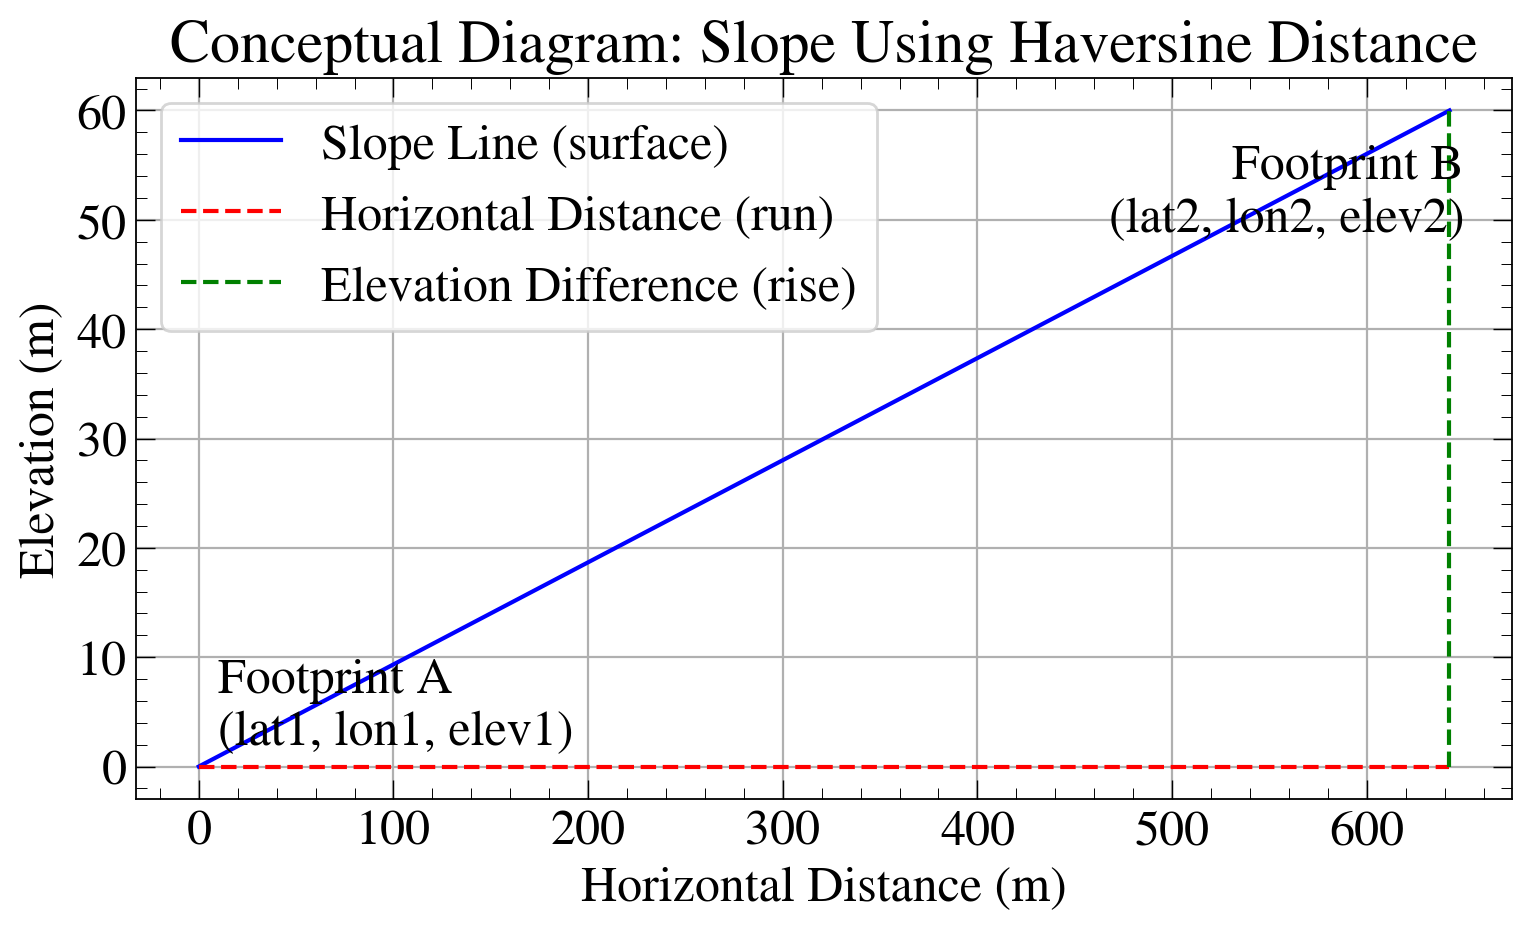

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Sample coordinates in degrees and elevation values
lat1, lon1, elev1 = 43.615, -116.202, 900  # Footprint A
lat2, lon2, elev2 = 43.620, -116.198, 960  # Footprint B

# Convert to radians
phi1, phi2 = radians(lat1), radians(lat2)
delta_phi = radians(lat2 - lat1)
delta_lambda = radians(lon2 - lon1)

# Haversine formula
R = 6371000  # Earth radius in meters
a = sin(delta_phi / 2) ** 2 + cos(phi1) * cos(phi2) * sin(delta_lambda / 2) ** 2
c = 2 * atan2(sqrt(a), sqrt(1 - a))
horiz_dist = R * c  # Horizontal ground distance in meters

# Elevation difference
rise = elev2 - elev1

# Prepare the triangle for plotting
x_vals = [0, horiz_dist]
y_vals = [0, rise]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Slope line
ax.plot(x_vals, y_vals, 'b-', label='Slope Line (surface)')

# Horizontal line (run)
ax.hlines(0, 0, horiz_dist, colors='r', linestyles='dashed', label='Horizontal Distance (run)')

# Vertical line (rise)
ax.vlines(horiz_dist, 0, rise, colors='g', linestyles='dashed', label='Elevation Difference (rise)')

# Annotate footprints
ax.text(10, 10, 'Footprint A\n(lat1, lon1, elev1)', verticalalignment='top', horizontalalignment='left')
ax.text(650, 48, 'Footprint B\n(lat2, lon2, elev2)', verticalalignment='bottom', horizontalalignment='right')

# Aesthetics
ax.set_title("Conceptual Diagram: Slope Using Haversine Distance")
ax.set_xlabel("Horizontal Distance (m)")
ax.set_ylabel("Elevation (m)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


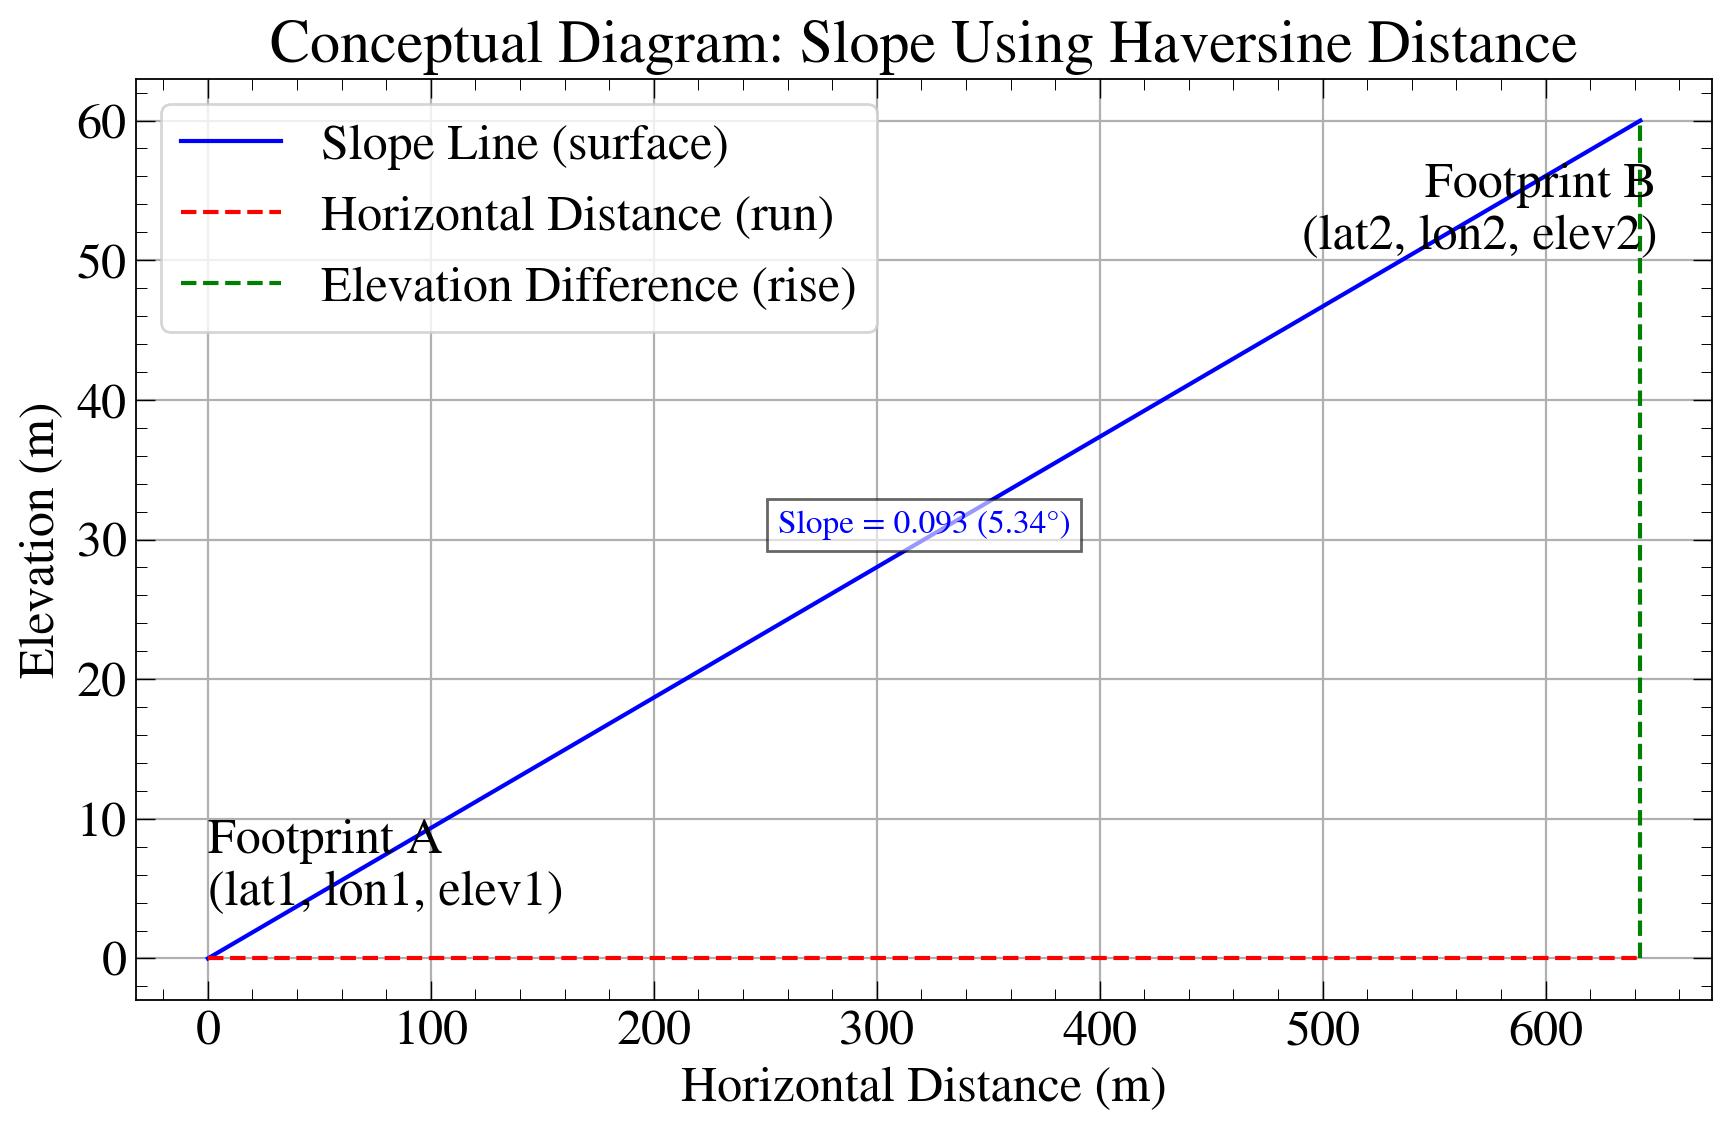

In [6]:
# Re-import after code execution state reset
import matplotlib.pyplot as plt
import numpy as np
from math import radians, sin, cos, sqrt, atan2, degrees

# Sample coordinates and elevations
lat1, lon1, elev1 = 43.615, -116.202, 900
lat2, lon2, elev2 = 43.620, -116.198, 960

# Haversine formula for horizontal distance
R = 6371000  # Earth radius in meters
phi1, phi2 = radians(lat1), radians(lat2)
delta_phi = radians(lat2 - lat1)
delta_lambda = radians(lon2 - lon1)

a = sin(delta_phi / 2) ** 2 + cos(phi1) * cos(phi2) * sin(delta_lambda / 2) ** 2
c = 2 * atan2(sqrt(a), sqrt(1 - a))
horiz_dist = R * c

# Elevation difference and slope
rise = elev2 - elev1
slope_ratio = rise / horiz_dist
slope_angle = degrees(atan2(rise, horiz_dist))  # in degrees

# Prepare for plotting
x_vals = [0, horiz_dist]
y_vals = [0, rise]

# Plot
fig, ax = plt.subplots(figsize=(9, 6))

# Slope line
ax.plot(x_vals, y_vals, 'b-', label='Slope Line (surface)')

# Horizontal distance
ax.hlines(0, 0, horiz_dist, colors='r', linestyles='dashed', label='Horizontal Distance (run)')

# Elevation difference
ax.vlines(horiz_dist, 0, rise, colors='g', linestyles='dashed', label='Elevation Difference (rise)')

# Annotate footprints
ax.text(0, 10, 'Footprint A\n(lat1, lon1, elev1)', verticalalignment='top', horizontalalignment='left')
ax.text(650, 50, 'Footprint B\n(lat2, lon2, elev2)', verticalalignment='bottom', horizontalalignment='right')

# Annotate slope value
slope_text = f"Slope = {slope_ratio:.3f} ({slope_angle:.2f}°)"
ax.text(horiz_dist/2, rise/2, slope_text, fontsize=12, color='blue', ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.6))

# Plot settings
ax.set_title("Conceptual Diagram: Slope Using Haversine Distance")
ax.set_xlabel("Horizontal Distance (m)")
ax.set_ylabel("Elevation (m)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

## GEDI vs ICESat-2 Footprint Overview

The footprint size refers to the ground area illuminated or sampled by each laser pulse from a satellite sensor like ICESat-2 or GEDI. Here's a comparison:

### **ICESat-2 (ATLAS sensor)**

| Parameter                  | Value                           |
|---------------------------|---------------------------------|
| **Footprint size**        | ~13 meters in diameter          |
| **Shape**                 | Circular                        |
| **Along-track spacing**   | ~0.7 meters between photons     |
| **Beam configuration**    | 6 beams (3 pairs: strong/weak)  |
| **Sensor**                | ATLAS (Advanced Topographic Laser Altimeter System) |
| **Pulse repetition rate** | ~10 kHz                         |
| **Wavelength**            | 532 nm (green)                  |
| **Repeat cycle**          | 91 days                         |

**Usage**: ICESat-2 is a **photon-counting lidar**, providing **high-resolution elevation profiles** across Earth’s surface, including ice sheets, vegetation, land, and oceans.

---

### **GEDI (Global Ecosystem Dynamics Investigation)**

| Parameter                  | Value                          |
|---------------------------|--------------------------------|
| **Footprint size**        | ~25 meters in diameter         |
| **Shape**                 | Circular                        |
| **Along-track spacing**   | ~60 meters between footprints   |
| **Beam configuration**    | 8 beams (3 power/energy pairs + 2 calibration) |
| **Sensor**                | Full-waveform lidar             |
| **Pulse repetition rate** | ~242 Hz                         |
| **Wavelength**            | 1064nm (near IR)               |
| **Repeat cycle**          | non-standard schedule       |

**Usage**: GEDI provides **3D structure of forests**, measuring canopy height, vertical structure, and ground elevation.

---

### Summary Table

|Instrument    | Sensor              | Footprint Size |Wavelength      | Shape   | Lidar Type            | Resolution Use           |Pulse repetition rate|Along-track spacing|Repeat cycle|Beam configuration|
|--------------|---------------------|----------------|-----------------|---------|------------------|-------------------------|---------------------|-------------------|---------------|------------------|
|**ICESat-2**  | ATLAS               | ~13 m          |532 nm (green) | Circular| Photon-counting  | Fine vertical profiling |~10 kHz              |~0.7 m between photons|91 days      |6 beams (3 pairs: strong/weak)|
|**GEDI**      | Full-waveform lidar | ~25 m          |1064nm (near IR)| Circular| Full-waveform    | Forest structure mapping|~242 Hz              |~60 m between footprints|non-standard schedule|8 beams (4 coverage and 4 full-power|




### Figure 1

The plot below gives you an intuitive feel for how each sensor samples the ground. 

- GEDI footprints are ~25 meters in diameter (larger circles)

- ICESat-2 footprints are ~13 meters in diameter (smaller circles)

- Each circle represents the area sampled by one laser pulse from the satellite

- Positions and spacing are simulated, but relative sizes are accurate


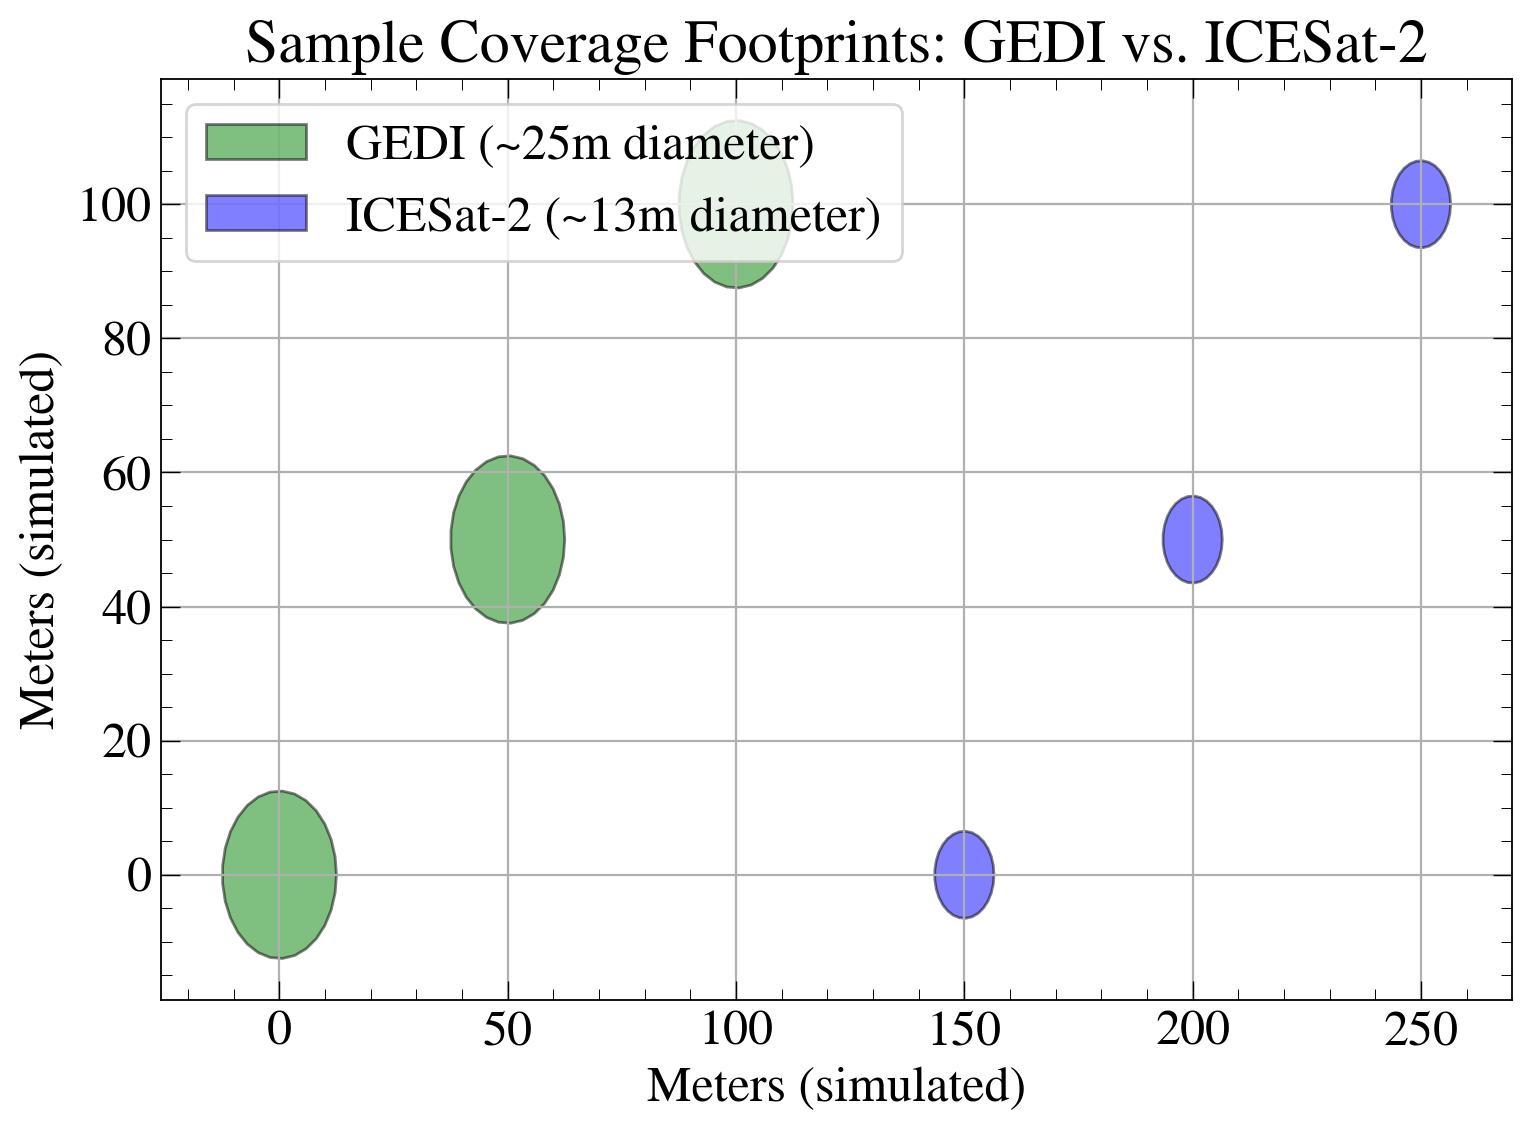

In [7]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
import numpy as np

# Helper function to create circular buffer (footprint) from a center point
def create_circle(center, radius_meters, resolution=30):
    angles = np.linspace(0, 2 * np.pi, resolution)
    return Polygon([
        (center.x + np.cos(a) * radius_meters, center.y + np.sin(a) * radius_meters)
        for a in angles
    ])

# Simulated center points (in meters for a local projection)
gedi_centers = [Point(x, y) for x, y in [(0, 0), (50, 50), (100, 100)]]
icesat2_centers = [Point(x, y) for x, y in [(150, 0), (200, 50), (250, 100)]]

# Create circular footprints (assuming local planar CRS)
gedi_footprints = [create_circle(center, 12.5) for center in gedi_centers]     # ~25 m diameter
icesat2_footprints = [create_circle(center, 6.5) for center in icesat2_centers]  # ~17 m diameter

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
for footprint in gedi_footprints:
    x, y = footprint.exterior.xy
    ax.fill(x, y, color='green', alpha=0.5, edgecolor='black', label='GEDI (~25m diameter)')

for footprint in icesat2_footprints:
    x, y = footprint.exterior.xy
    ax.fill(x, y, color='blue', alpha=0.5, edgecolor='black', label='ICESat-2 (~13m diameter)')

# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

ax.set_title("Sample Coverage Footprints: GEDI vs. ICESat-2")
ax.set_xlabel("Meters (simulated)")
ax.set_ylabel("Meters (simulated)")
ax.grid(True)
plt.tight_layout()
plt.show()

### Figure 2

Below is another visual comparison of GEDI and ICESat-2 footprints on a simplified 2D map:

- GEDI:
    - Large single green circle

    - ~25 m diameter

    - Captures coarse but full-waveform data, ideal for forest structure

- ICESat-2:
    - Multiple small blue circles

    - Each ~13 m in diameter

    - Footprints are spaced ~0.7 meters apart along the diagonal path, representing the sensor’s high-resolution sampling

This visual shows how ICESat-2 provides dense sampling along a track, while GEDI captures broader snapshots at intervals. This layout simulates how GEDI and ICESat-2 scan across the same terrain at different densities and angles.

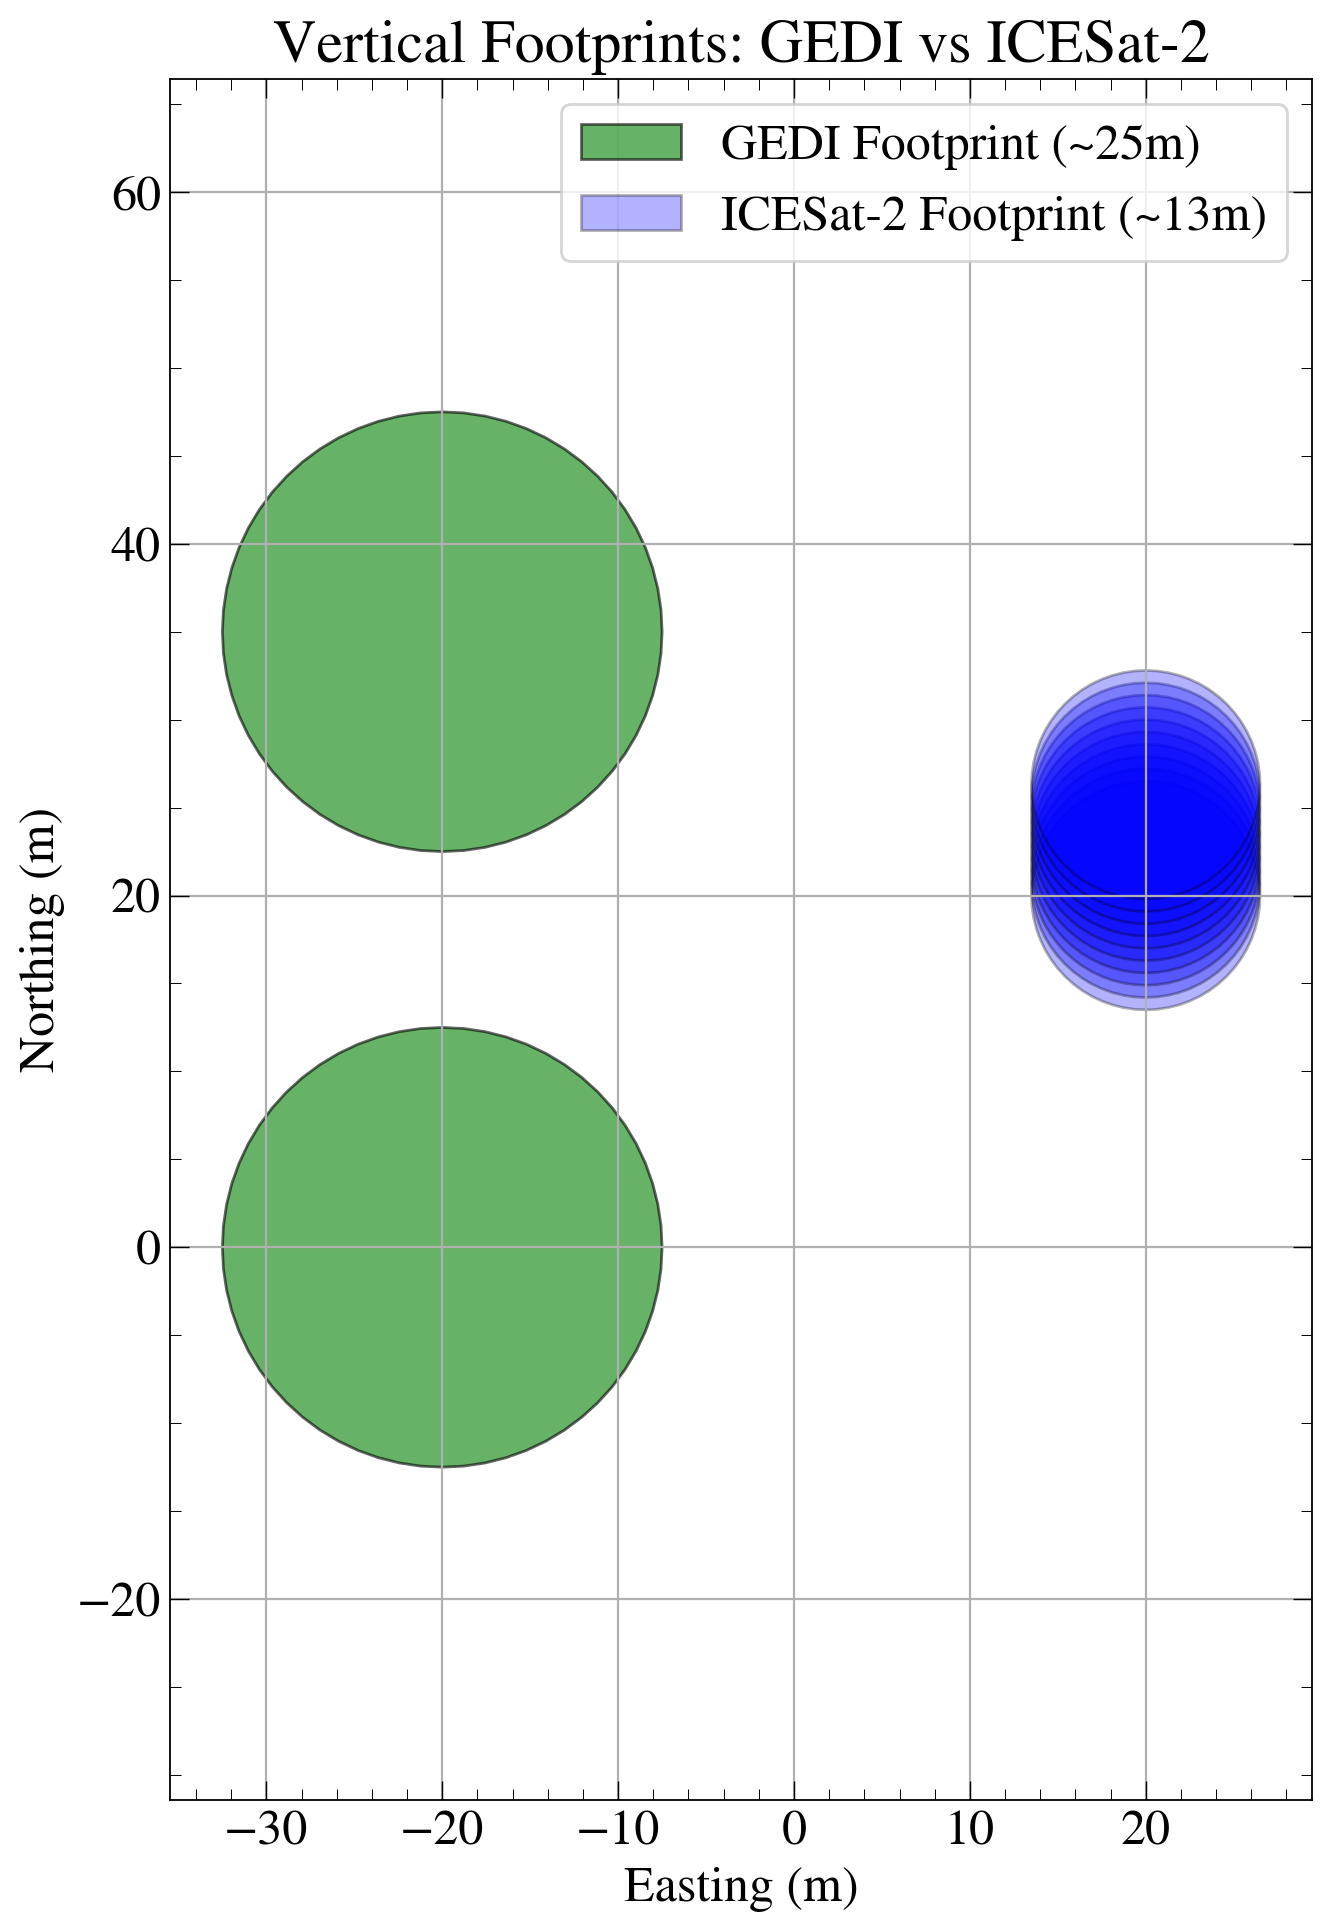

In [8]:
# Create mock GEDI and ICESat-2 footprints
gedi_footprints = [Point(-20, 0).buffer(12.5), Point(-20, 35).buffer(12.5)]  # GEDI on the left

# ICESat-2 footprints placed around (20, 20)
icesat2_footprints = [Point(20, 20 + i * 0.7).buffer(6.5) for i in range(10)]

# Plot using basic matplotlib
fig, ax = plt.subplots(figsize=(7, 10))

# Plot GEDI footprints
for footprint in gedi_footprints:
    x, y = footprint.exterior.xy
    ax.fill(x, y, color='green', alpha=0.6, edgecolor='black', label='GEDI Footprint (~25m)')

# Plot ICESat-2 footprints
for footprint in icesat2_footprints:
    x, y = footprint.exterior.xy
    ax.fill(x, y, color='blue', alpha=0.3, linewidth=1, edgecolor='black', label='ICESat-2 Footprint (~13m)')

# De-duplicate legend labels
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys())

# Annotations
plt.title("Vertical Footprints: GEDI vs ICESat-2")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

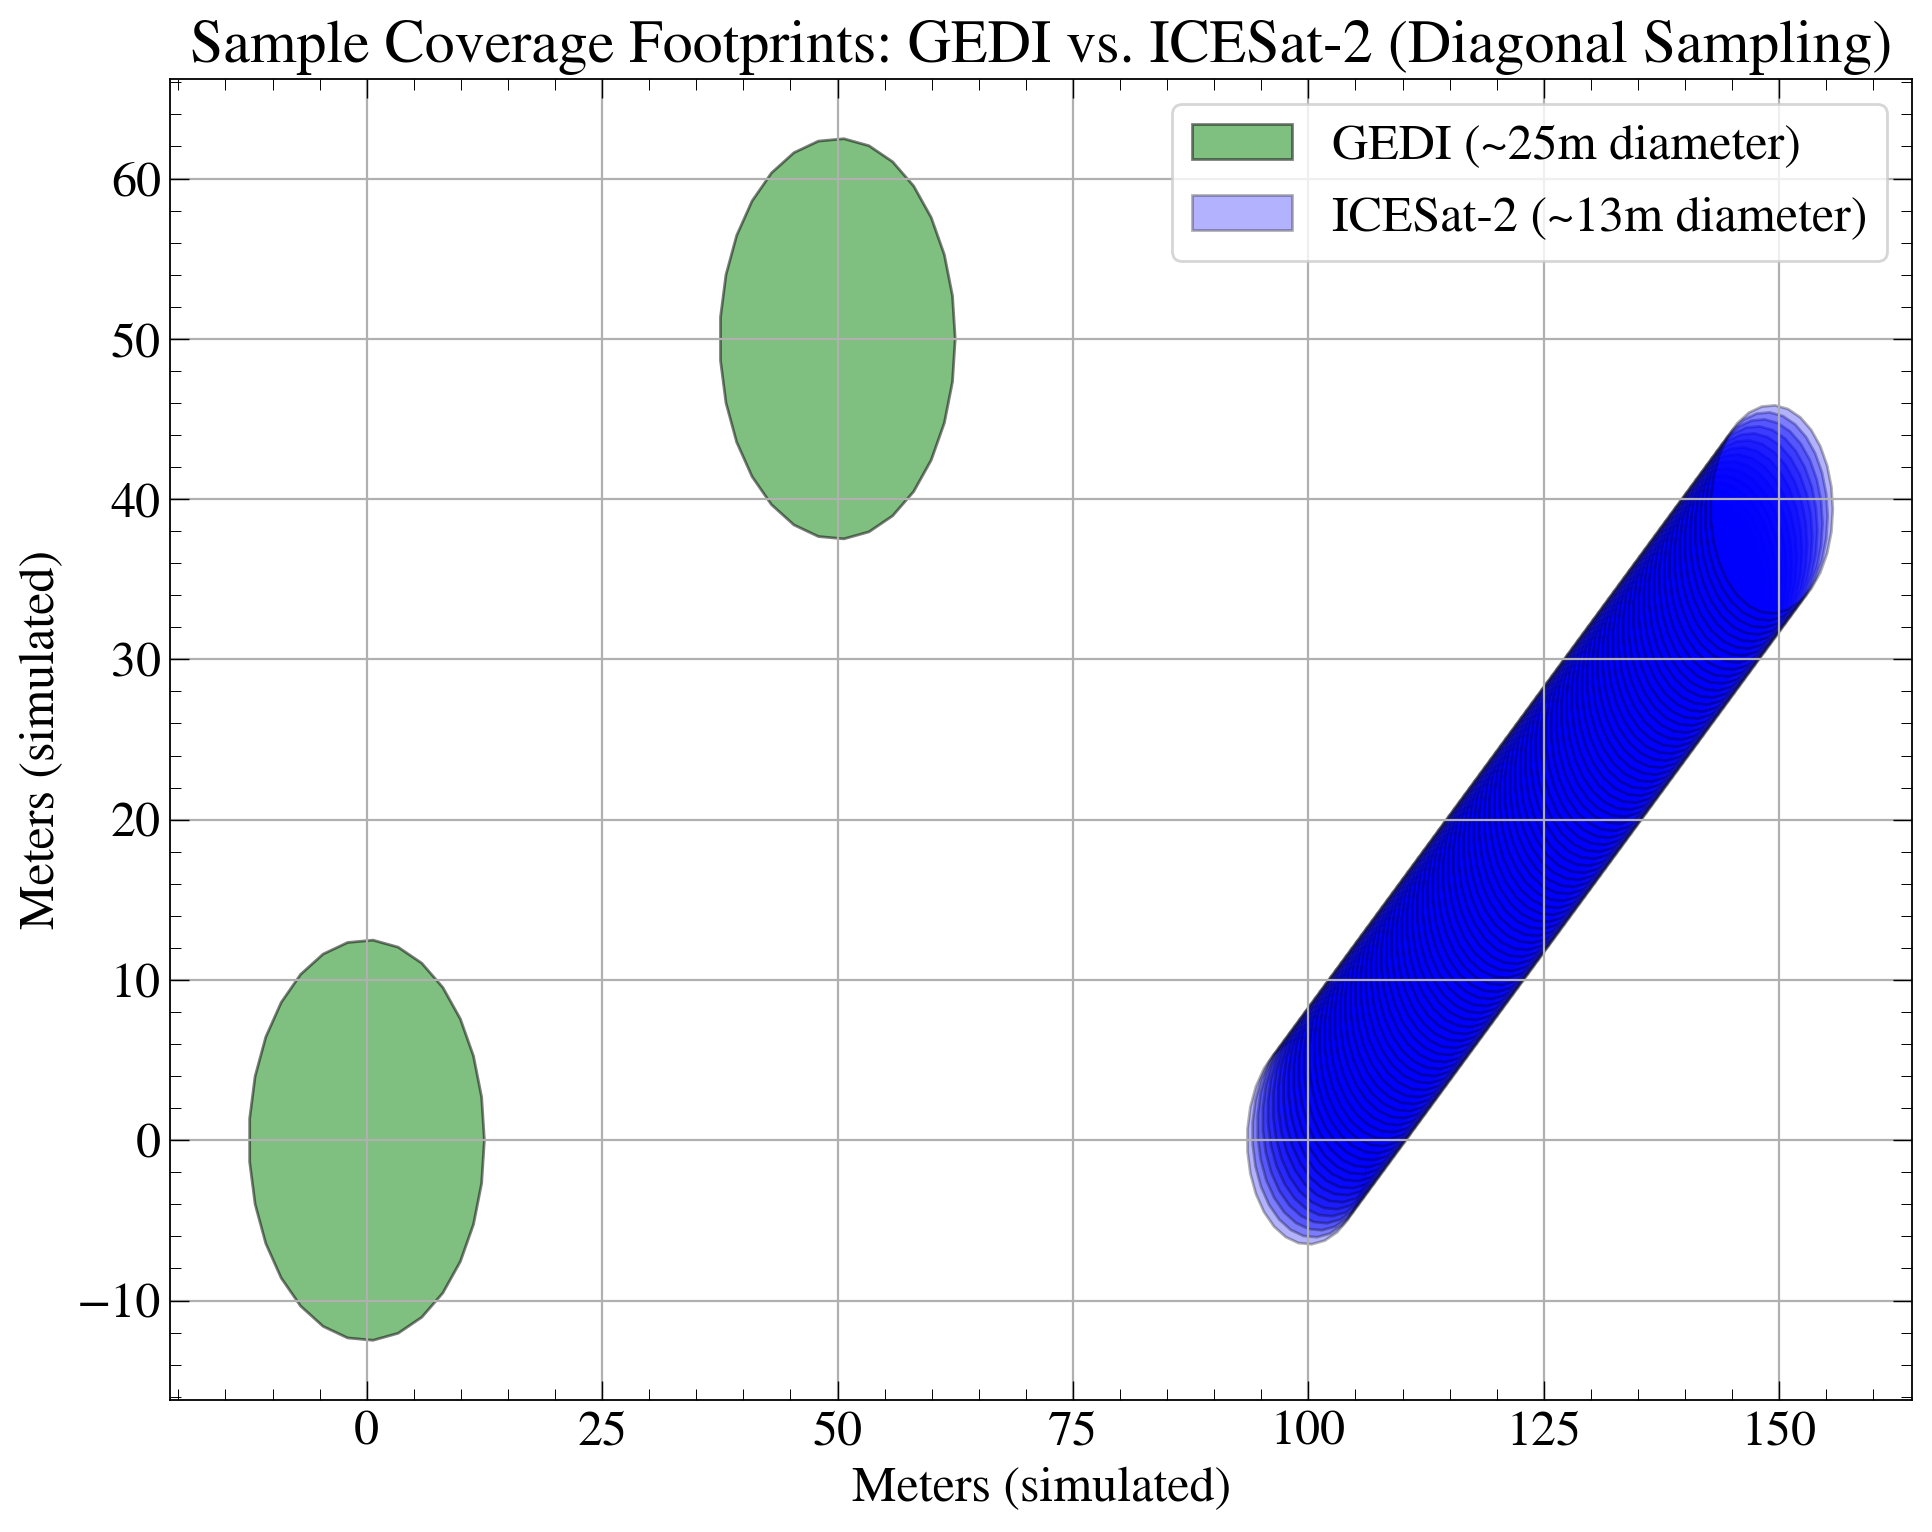

In [9]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
import numpy as np

# Helper function to create circular buffer (footprint) from a center point
def create_circle(center, radius_meters, resolution=30):
    angles = np.linspace(0, 2 * np.pi, resolution)
    return Polygon([
        (center.x + np.cos(a) * radius_meters, center.y + np.sin(a) * radius_meters)
        for a in angles
    ])

# Simulated GEDI center points
# gedi_centers = [Point(x, y) for x, y in [(0, 0), (50, 50), (100, 100)]]
gedi_centers = [Point(x, y) for x, y in [(0, 0), (50, 50)]]

# Create ICESat-2 centers from (150, 0) to (250, 100) spaced ~0.7 meters diagonally
start = np.array([100, 0])
# end = np.array([200, 100])
end = np.array([150, 40])
vector = end - start
distance = np.linalg.norm(vector)
direction = vector / distance
num_points = int(distance / 0.7)
icesat2_centers = [Point(*(start + i * 0.7 * direction)) for i in range(num_points)]

# Create circular footprints
gedi_footprints = [create_circle(center, 12.5) for center in gedi_centers]      # ~25 m diameter
icesat2_footprints = [create_circle(center, 6.5) for center in icesat2_centers]  # ~13 m diameter

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
for footprint in gedi_footprints:
    x, y = footprint.exterior.xy
    ax.fill(x, y, color='green', alpha=0.5, edgecolor='black', label='GEDI (~25m diameter)')

for footprint in icesat2_footprints:
    x, y = footprint.exterior.xy
    ax.fill(x, y, color='blue', alpha=0.3, linewidth=1, edgecolor='black', label='ICESat-2 (~13m diameter)')

# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

ax.set_title("Sample Coverage Footprints: GEDI vs. ICESat-2 (Diagonal Sampling)")
ax.set_xlabel("Meters (simulated)")
ax.set_ylabel("Meters (simulated)")
ax.grid(True)
plt.tight_layout()
plt.show()

## Random Forest Workflow

In [10]:
# from graphviz import Digraph

# # Create a new directed graph
# dot = Digraph(comment='Random Forest Workflow', format='png')

# # Define nodes for each step
# dot.node('A', 'Input Data')
# dot.node('B', 'Data Preprocessing\n(Missing Value Imputation,\nNormalization)')
# dot.node('C', 'Feature Engineering\nor Selection')
# dot.node('D', 'Train-Test Split')
# dot.node('E', 'Model Training\n(Random Forest)')
# dot.node('F', 'Model Evaluation\n(Accuracy, ROC, etc.)')
# dot.node('G', 'Prediction / Deployment')

# # Connect the nodes with directed edges
# dot.edge('A', 'B')
# dot.edge('B', 'C')
# dot.edge('C', 'D')
# dot.edge('D', 'E')
# dot.edge('E', 'F')
# dot.edge('F', 'G')

# # Render the graph to a file and view it
# dot.render('random_forest_workflow', view=True)

In [11]:
# from graphviz import Digraph

# # Create a new directed graph
# dot = Digraph(comment='Random Forest Workflow', format='png')

# # Add nodes and edges to the graph
# dot.node('A', 'Data')
# dot.node('B', 'Model')
# dot.node('C', 'Prediction')

# dot.edges(['AB', 'BC'])

# # Render and view the graph
# dot.render('workflow', view=True)